<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/Copia_de_TFM__TABULAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATOS

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Fechas de inicio y fin
start_date = "2016-01-04"
end_date = "2022-12-30"


ticker_componentes_IBEX = ['BKT', 'IBE', 'REP', 'TEF', 'ACS', 'FER', 'IDR', 'BBVA', 'ITX', 'SAN',
       'ENG', 'SAB', 'MAP', 'GRF', 'MTS', 'AMS', 'IAG', 'CABK', 'SCYR', 'ELE',
       'ACX', 'AENA', 'ANA', 'MRL', 'CLNX', 'MEL', 'COL', 'NTGY', 'SLR', 'FDR',
       'ROVI', 'RED', 'ANE', 'LOG', 'UNI']

ticker_componentes_IBEX = [ticker + ".MC" for ticker in ticker_componentes_IBEX]
"""
tickers = {
    "SP500": "^GSPC",
    "DAX": "^GDAXI",
    "EUROSTOXX": "^STOXX50E",
    "Oro": "GC=F",       # Oro (futuros)
    "Cobre": "HG=F",     # Cobre (futuros)
    "Dólar/Euro": "USDEUR=X",     # Precio del dólar en euros
    "Yuan/Euro": "CNYEUR=X"     # Precio del rublo en euros
}"""
tickers_indices = ["^IBEX", "^GSPC", "^GDAXI", "^STOXX50E", "GC=F", "HG=F", "USDEUR=X","CNYEUR=X"]

data_componentes_IBEX = yf.download(  ticker_componentes_IBEX,  start=start_date, end=end_date)["Adj Close"]
data_indices =          yf.download(  tickers_indices,          start=start_date, end=end_date)["Adj Close"]



[*********************100%%**********************]  35 of 35 completed
[*********************100%%**********************]  8 of 8 completed


In [ ]:
dates = pd.date_range(start_date, end_date)
business_days = pd.date_range(start=start_date, end=end_date, freq='B')

In [ ]:
data_componentes_IBEX = data_componentes_IBEX.reindex(dates)
data_indices =          data_indices.reindex(dates)

In [ ]:
data_componentes_IBEX.shape, data_indices.shape

((2553, 35), (2553, 8))

In [ ]:
# NUMERO DE NANS TOTALES

print( data_componentes_IBEX.isna().sum())
print( data_indices.isna().sum())

ACS.MC      762
ACX.MC      762
AENA.MC     762
AMS.MC      762
ANA.MC      762
ANE.MC     2168
BBVA.MC     762
BKT.MC      762
CABK.MC     762
CLNX.MC     762
COL.MC      762
ELE.MC      762
ENG.MC      762
FDR.MC      762
FER.MC      762
GRF.MC      762
IAG.MC      762
IBE.MC      762
IDR.MC      762
ITX.MC      762
LOG.MC      762
MAP.MC      762
MEL.MC      762
MRL.MC      762
MTS.MC      762
NTGY.MC     762
RED.MC      762
REP.MC      762
ROVI.MC     762
SAB.MC      762
SAN.MC      762
SCYR.MC     762
SLR.MC      762
TEF.MC      762
UNI.MC     1145
dtype: int64
CNYEUR=X     731
GC=F         795
HG=F         795
USDEUR=X     732
^GDAXI       779
^GSPC        792
^IBEX        763
^STOXX50E    791
dtype: int64


In [ ]:
# NUMERO DE NANS TOTALES EN DIAS LABORALES

print(
    data_componentes_IBEX[data_componentes_IBEX.index.isin(business_days)].isna().sum()
)

print(
    data_indices[data_indices.index.isin(business_days)].isna().sum()
)

ACS.MC       34
ACX.MC       34
AENA.MC      34
AMS.MC       34
ANA.MC       34
ANE.MC     1440
BBVA.MC      34
BKT.MC       34
CABK.MC      34
CLNX.MC      34
COL.MC       34
ELE.MC       34
ENG.MC       34
FDR.MC       34
FER.MC       34
GRF.MC       34
IAG.MC       34
IBE.MC       34
IDR.MC       34
ITX.MC       34
LOG.MC       34
MAP.MC       34
MEL.MC       34
MRL.MC       34
MTS.MC       34
NTGY.MC      34
RED.MC       34
REP.MC       34
ROVI.MC      34
SAB.MC       34
SAN.MC       34
SCYR.MC      34
SLR.MC       34
TEF.MC       34
UNI.MC      417
dtype: int64
CNYEUR=X      3
GC=F         67
HG=F         67
USDEUR=X      4
^GDAXI       51
^GSPC        64
^IBEX        35
^STOXX50E    63
dtype: int64


In [ ]:
# ELIMINAR DEL DATA SET ANE.MC y UNI.MC

data_componentes_IBEX.drop(["ANE.MC"],axis = 1, inplace=True)
data_componentes_IBEX.drop(["UNI.MC"],axis = 1, inplace=True)

In [ ]:
# RELLENAR NANS

data_componentes_IBEX = data_componentes_IBEX.fillna(method="ffill")
data_indices = data_indices.fillna(method="ffill")

print(data_componentes_IBEX.isna().sum().sum())
print(data_indices.isna().sum().sum())

0
0


In [ ]:
data_componentes_IBEX.head()

ACS.MC    ACX.MC    AENA.MC     AMS.MC     ANA.MC   BBVA.MC  \
2016-01-04  15.980102  5.751740  79.277687  36.199352  60.231125  4.407446   
2016-01-05  16.011051  5.890940  79.734390  36.367855  60.508480  4.436829   
2016-01-06  15.887270  5.630723  79.315735  36.458931  60.346695  4.342002   
2016-01-07  15.447844  5.364235  77.907539  35.552700  58.127888  4.286576   
2016-01-08  15.206473  5.406247  78.630676  35.038101  58.089375  4.189745   

              BKT.MC   CABK.MC    CLNX.MC    COL.MC  ...    MTS.MC    NTGY.MC  \
2016-01-04  4.751967  2.298497  14.772964  5.183412  ...  7.146004  10.938684   
2016-01-05  4.754172  2.279122  14.747092  5.223532  ...  7.577412  11.072262   
2016-01-06  4.649079  2.198032  14.574614  5.055030  ...  7.086566  10.989147   
2016-01-07  4.581467  2.142059  14.600486  4.894553  ...  6.708847  10.891188   
2016-01-08  4.524877  2.115507  14.238275  4.886529  ...  6.467259  10.768414   

               RED.MC    REP.MC    ROVI.MC    SAB.MC    SAN.MC   SCYR.MC  \
2016-01-04  11.855688  6.404623  12.837639  1.201982  3.033155  1.313086   
2016-01-05  11.923389  6.347961  12.837639  1.198304  3.007060  1.333093   
2016-01-06  11.899771  6.166517  12.846617  1.186534  2.910235  1.284186   
2016-01-07  11.828920  5.922049  12.765820  1.158581  2.850492  1.210084   
2016-01-08  11.776964  5.684580  13.017186  1.120330  2.773582  1.202673   

            SLR.MC    TEF.MC  
2016-01-04   0.700  5.248940  
2016-01-05   0.745  5.275911  
2016-01-06   0.720  5.237834  
2016-01-07   0.700  5.197640  
2016-01-08   0.700  5.072829  

[5 rows x 33 columns]

In [ ]:
import matplotlib.pyplot as plt

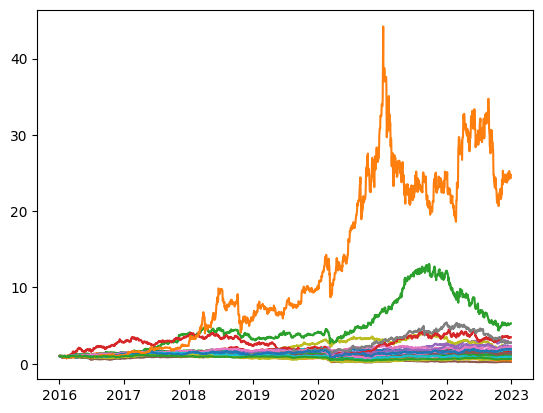

In [ ]:
plt.plot(data_componentes_IBEX / data_componentes_IBEX.iloc[0,:]);

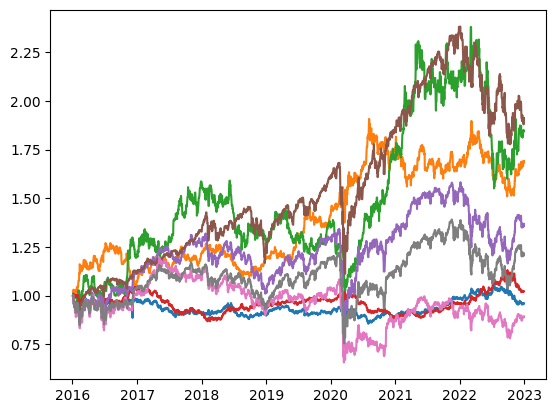

In [ ]:
plt.plot(data_indices / data_indices.iloc[0,:]);

# CREAR DATASET

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate):
    return (np.mean(returns) - risk_free_rate) / np.std(returns)

In [ ]:

def create_dataset(ibex_data, bench, _days_backward=28, _days_forward = 7 , _days_steps = 1, create_suffle_data = True):
  days_steps = _days_steps
  days_backward = _days_backward
  days_forward =  _days_forward

  datos_analisis = ibex_data
  datos_analisis_bench = bench
  X_DATA = []
  Y_DATA = []
  X_DATA_POS = []
  Y_REAL_FORWARD_SHARPE = []

  for i in range(days_backward, len(datos_analisis), days_steps):

      X_forward = datos_analisis[i:i+days_forward]

      X_data = datos_analisis[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data = X_data/ X_data.iloc[0,:]

      X_data_bench = datos_analisis_bench[i-days_backward:i]
      # Norm todos empiezan en 1
      X_data_bench = X_data_bench/ X_data_bench.iloc[0]

      ## RETONORNOS
      last_day = X_data.iloc[X_data.shape[0]-1,:]
      returns_n = 2 * (last_day - last_day.min()) / (last_day.max() - last_day.min()) - 1

      ## MAXIMOS
      x_max =  X_data.max()
      max_n = 2 * (x_max - x_max.min()) / (x_max.max() - x_max.min()) - 1

      ## MINIMOS
      x_min = X_data.min()
      min_n = 2 * (x_min - x_min.min()) / (x_min.max() - x_min.min()) - 1

      ## STD
      x_std = X_data.std()
      std_n = 2 * (x_std - x_std.min()) / (x_std.max() - x_std.min()) - 1

      ## MEDIA
      x_mean = X_data.mean()
      mean_n = 2 * (x_mean - x_mean.min()) / (x_mean.max() - x_mean.min()) - 1

      ## SHARPE
      x_sharpe = x_mean / (x_std + 0.000001)
      sharpe_n = 2 * (x_sharpe - x_sharpe.min()) / (x_sharpe.max() - x_sharpe.min()) - 1


      ## ALPHA Y BETA

      betas = {}
      alphas = {}

      market_returns = X_data_bench.diff().dropna()
      df = X_data.diff().dropna()

      # Para cada activo, calcular beta y alpha
      for column in df.columns:
          asset_returns = df[column]

          # Calcula el beta
          cov_matrix = np.cov(asset_returns, market_returns)
          beta = cov_matrix[0, 1] / cov_matrix[1, 1]
          betas[column] = beta

          # Calcula el alpha
          alpha = asset_returns.mean() - beta * market_returns.mean()
          alphas[column] = alpha

      betas_series = pd.Series(betas)
      alphas_series = pd.Series(alphas)

      beta_n = 2 * (betas_series - betas_series.min()) / (betas_series.max() - betas_series.min()) - 1
      alpha_n = 2 * (alphas_series - alphas_series.min()) / (alphas_series.max() - alphas_series.min()) - 1

      rs = calculate_sharpe_ratio(np.log(X_forward).diff().dropna(), 0)
      Y_REAL_FORWARD_SHARPE.append(rs)
      y = np.argsort(np.argsort(-rs))
      y_n = 2 * (y - y.min()) / (y.max() - y.min()) - 1
      #print(y)
      #print(y_n)
      # TODO: Unir returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n , en un solo dataframe

      # Unir todas las series en un DataFrame
      features_df = pd.concat([returns_n, max_n, min_n, std_n, mean_n, sharpe_n, beta_n, alpha_n], axis=1)

      # Nombrar las columnas
      features_df.columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha']


      if create_suffle_data == True :
        for _ in range(10):
          t = features_df.reset_index(drop=True)
          t = pd.concat([t, y_n.reset_index(drop=True) ], axis=1).sample(frac=1)

          p = t.iloc[:,-1]
          t = t.iloc[:,:-1]

          X_DATA.append(t)
          Y_DATA.append(p)
          X_DATA_POS.append(t.index)
      else:
          X_DATA.append(features_df)
          Y_DATA.append(y_n)
          X_DATA_POS.append(features_df.index)



      #print(features_df)
      #print(y)
      #print(rs)

  return np.array(X_DATA) , np.array(Y_DATA) , np.array(Y_REAL_FORWARD_SHARPE), np.array(X_DATA_POS)





## dataset

In [ ]:
days_backward = 7
days_forward = 7
days_steps = 7
bench = data_indices["^IBEX"]

X_COMP_TRAIN , Y_COMP_TRAIN, Y_REAL_FORWARD_SHARPE_TRAIN, X_COMP_POS_TRAIN = create_dataset(data_componentes_IBEX.loc["2016-01-04":"2020-08-03"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_COMP_VALID , Y_COMP_VALID, Y_REAL_FORWARD_SHARPE_VALID, X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2020-08-04":"2021-12-29"], bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
X_COMP_TEST  , Y_COMP_TEST , Y_REAL_FORWARD_SHARPE_TEST , X_COMP_POS_VALID = create_dataset(data_componentes_IBEX.loc["2021-12-30":],             bench, _days_backward=days_backward , _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)


#X_MACRO_TRAIN , Y_MACRO_TRAIN , _, _ =  create_dataset(data_indices.loc["2016-01-04":"2020-08-03"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
#X_MACRO_VALID , _, _, _ =  create_dataset(data_indices.loc["2020-08-04":"2021-12-29"],  bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)
#X_MACRO_TEST  , _, _, _ =  create_dataset(data_indices.loc["2021-12-30":],              bench, _days_backward=days_backward, _days_forward = days_forward , _days_steps = days_steps, create_suffle_data = False)




In [ ]:
pd.DataFrame(Y_COMP_TRAIN).isna().sum().sum()

0

In [ ]:
np.isnan(X_COMP_TRAIN).any()

False

In [ ]:
np.where(np.isnan(X_COMP_TRAIN))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [ ]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha'])

returns       max       min       std      mean    sharpe      beta  \
0  -0.157178 -0.939745  0.138772 -0.302376 -0.182299 -0.779264 -0.428838   
1  -0.310640 -0.247070 -0.198515  0.131786 -0.365824 -0.903720  0.027834   
2   0.372774 -0.820775  0.692545 -0.875483  0.252522  0.007974 -0.709576   
3   0.057862 -0.776908  0.429323 -0.503620  0.054930 -0.660930 -0.509768   
4   0.012050 -0.856738  0.367423 -0.435128 -0.042154 -0.709074 -0.501571   
5  -0.170107 -0.792591  0.121304 -0.291795 -0.186359 -0.783795 -0.328261   
6  -0.148972 -0.985568  0.149860 -0.373851 -0.235636 -0.746982 -0.464686   
7  -0.567982 -1.000000 -0.416283  0.078256 -0.705138 -0.897594 -0.373555   
8   0.003691 -1.000000  0.356129 -0.564012 -0.043225 -0.613826 -0.578123   
9  -0.273880 -0.759200 -0.018908 -0.119086 -0.366323 -0.846205 -0.274780   
10  1.000000  0.307709  1.000000 -0.619218  1.000000 -0.528955 -0.726078   
11  0.477672 -0.752266  0.896350 -1.000000  0.370335  1.000000 -0.728398   
12  0.287238 -0.797322  0.739242 -0.768092  0.285370 -0.316891 -0.604494   
13  0.104049 -0.917139  0.491727 -0.629932  0.040881 -0.544245 -0.582321   
14  0.351779 -0.491596  0.826445 -0.811782  0.322311 -0.207668 -0.485207   
15  0.109439 -0.062366  0.499010 -0.282119  0.186203 -0.781288 -0.097720   
16  0.500755 -0.616817  1.000000 -0.988233  0.449065  0.847741 -0.650550   
17 -0.523981 -1.000000 -0.356830 -0.017464 -0.747450 -0.877667 -0.535505   
18  0.077661 -1.000000  0.456074 -0.702505 -0.022745 -0.449006 -0.727320   
19  0.009014 -0.950869  0.363322 -0.542132 -0.085561 -0.633921 -0.547835   
20 -0.144213 -0.916477  0.156290 -0.317549 -0.157531 -0.772222 -0.418964   
21 -0.087576 -0.721040  0.096088 -0.309711 -0.223735 -0.776853 -0.376609   
22 -0.478368 -0.836246 -0.295201  0.126460 -0.492715 -0.904235 -0.179079   
23 -0.770339  0.878191 -0.689696  1.000000 -0.512815 -1.000000  1.000000   
24  0.275285 -0.620085  0.723092 -0.751337  0.256405 -0.352923 -0.509514   
25  0.392802 -0.822342  0.881874 -0.963102  0.319945  0.563756 -0.704316   
26 -1.000000 -1.000000 -1.000000  0.619641 -1.000000 -0.974175 -0.088655   
27  0.664373 -0.564880  0.900477 -0.849544  0.467400 -0.081560 -1.000000   
28 -0.414177 -1.000000 -0.208469 -0.031852 -0.399571 -0.869593 -0.342004   
29 -0.646526 -1.000000 -0.522406  0.156805 -0.725999 -0.912400 -0.311205   
30 -0.626875 -0.525957 -0.495855  0.420557 -0.641298 -0.949765  0.074765   
31  0.480229  1.000000  1.000000 -0.267060  0.632561 -0.779781  0.278687   
32  0.038477 -0.840135  0.403130 -0.524927  0.039746 -0.644887 -0.477155   

       alpha  
0  -0.519631  
1  -0.063100  
2  -0.395950  
3  -0.426180  
4  -0.457952  
5  -0.399715  
6  -0.559033  
7  -0.828427  
8  -0.566117  
9  -0.425889  
10  0.164593  
11 -0.323272  
12 -0.337519  
13 -0.478471  
14 -0.121154  
15  0.162138  
16 -0.199741  
17 -1.000000  
18 -0.693146  
19 -0.521450  
20 -0.494647  
21 -0.386523  
22 -0.490172  
23  0.785309  
24 -0.224037  
25 -0.370462  
26 -0.855747  
27 -0.506212  
28 -0.644283  
29 -0.819553  
30 -0.295072  
31  1.000000  
32 -0.401399

<Axes: >

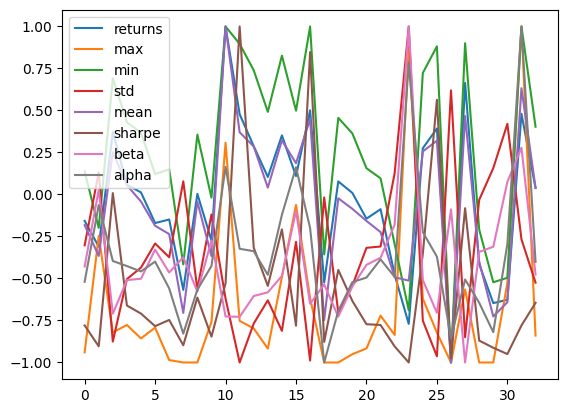

In [ ]:
pd.DataFrame(X_COMP_TRAIN[0], columns = ['returns', 'max', 'min', 'std', 'mean', 'sharpe', 'beta', 'alpha']).plot()

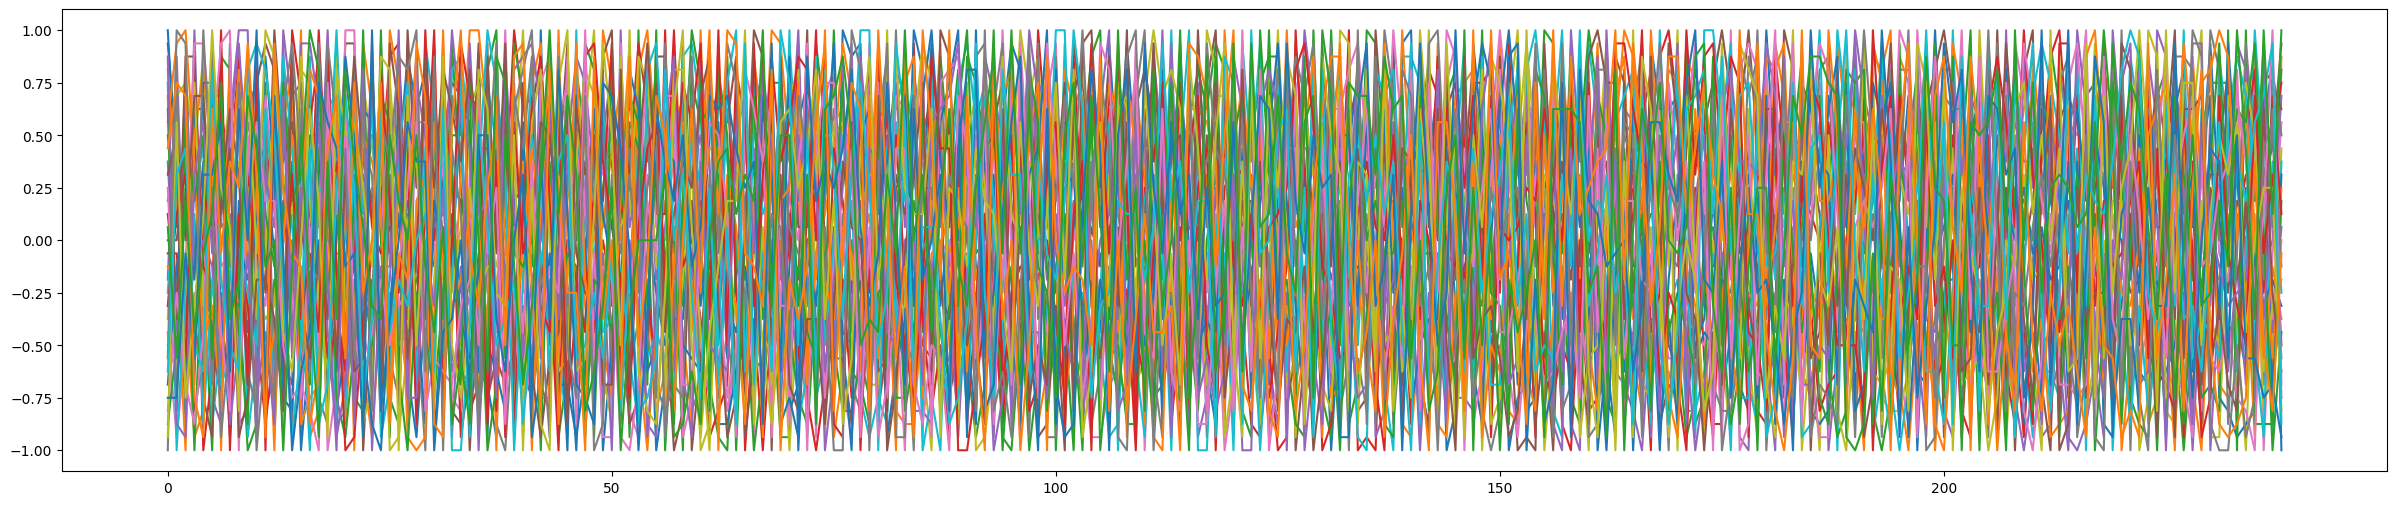

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_TRAIN , columns=data_componentes_IBEX.columns).iloc[:,:] );

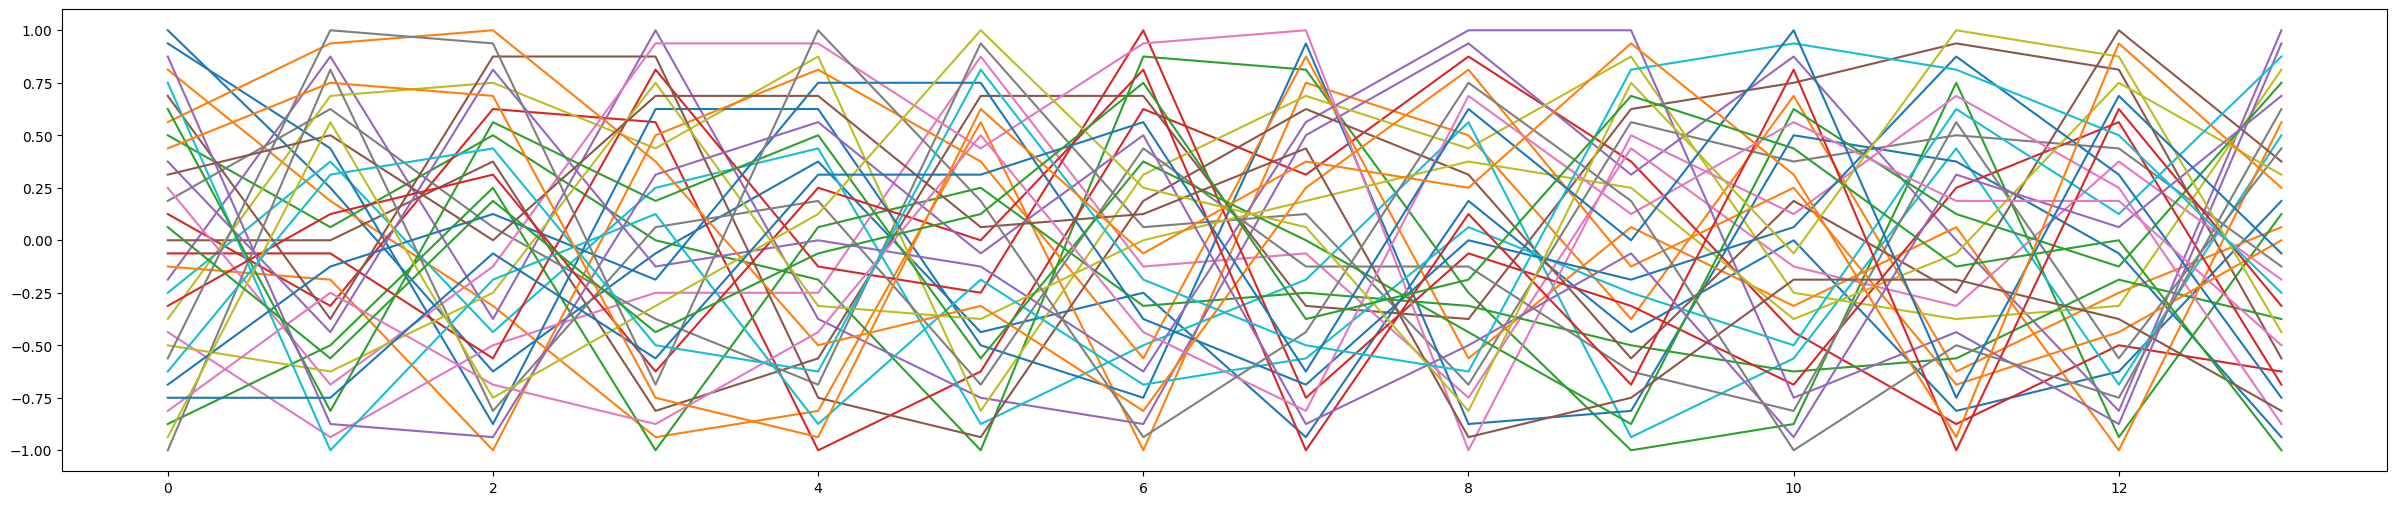

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_TRAIN[:14] , columns=data_componentes_IBEX.columns).iloc[:,:] );

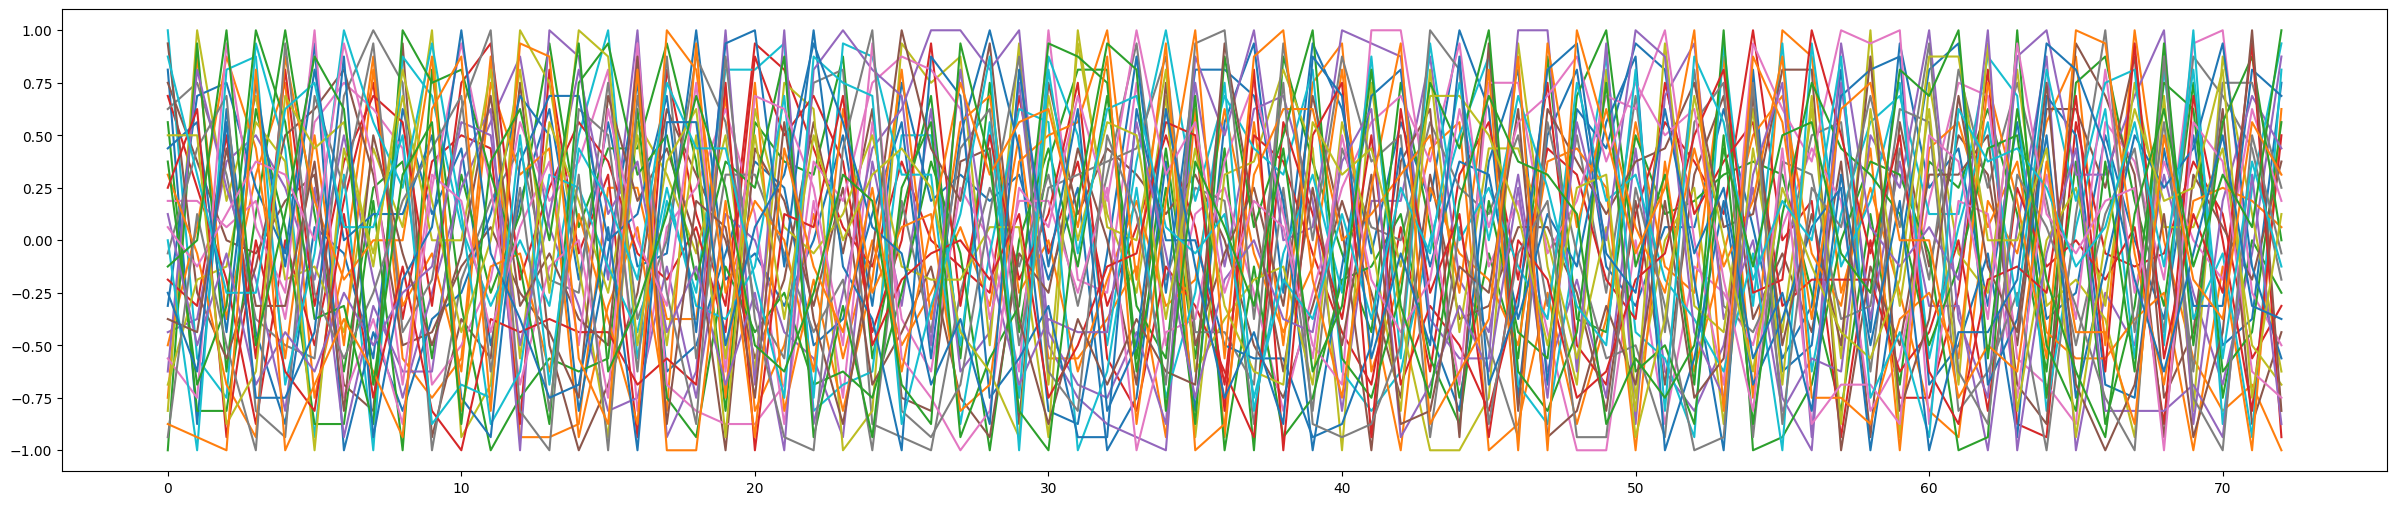

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(pd.DataFrame(Y_COMP_VALID , columns=data_componentes_IBEX.columns).iloc[:,:] );

In [ ]:
X_COMP_TRAIN.shape , Y_COMP_TRAIN.shape, Y_REAL_FORWARD_SHARPE_TRAIN.shape, X_COMP_POS_TRAIN.shape

((239, 33, 8), (239, 33), (239, 33), (239, 33))

In [ ]:
X_COMP_VALID.shape , Y_COMP_VALID.shape, Y_REAL_FORWARD_SHARPE_VALID.shape, X_COMP_POS_VALID.shape

((73, 33, 8), (73, 33), (73, 33), (52, 33))

In [ ]:
X_COMP_TEST.shape  , Y_COMP_TEST.shape , Y_REAL_FORWARD_SHARPE_TEST.shape , X_COMP_POS_VALID.shape

((52, 33, 8), (52, 33), (52, 33), (52, 33))

# REGLAS EVOLUTIVO

In [ ]:
import random
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, BatchNormalization, Concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
import time
from keras import backend as K
import tensorflow as tf

In [ ]:
class evo_ranking():
  def __init__(self):

    self.gen_dic = {
        "neuronas_A" : [1,2,3,4],
        "l1_A" : [0,0.25,0.5],
        "l2_A" : [0,0.25, 0.5, 0.75, 0.9],
        "dropput_A" : [0, 0.5, 0.9],
        "layers_A" : [1,2, 3],
        "begin_dropput" : [0,0.5, 0.9],
        "bach_norm_begin_A" : [0, 1],
        "bach_norm_layers_A" : [0, 1],

    }

    self.historical = self.historical = {key: {} for key in self.gen_dic.keys()}

  def initial_population(self , population_size):
    "crear n arrays (population_size) con valores aleatorios escogidos de self.gen_dic "
    population = []
    for _ in range(population_size):
        individual = [random.choice(values) for _, values in self.gen_dic.items()]
        population.append(individual)
    return np.array(population)


  def count_occurrences(self, values, population):
      return {value: np.sum(population == value) for value in values}

  def count_gen(self, pop, generation):

    counts = {}
    keys = list(evo.gen_dic.keys())

    for i in range(len(self.gen_dic)):
      #print(i)

      #print(self.gen_dic[keys[i]])

      counts[keys[i]] = self.count_occurrences(self.gen_dic[keys[i]], pop[:, i])

    for i in range(len(counts)):

      self.historical[keys[i]][generation] = counts[keys[i]]


  def show_historical(self):

    h =  {key: {} for key in self.gen_dic.keys()}

    fig, axs = plt.subplots(len(self.gen_dic), 1, figsize=(10, 20))
    _keys = list(self.historical.keys())

    for i in range(len(self.historical)):
      #print(i)

      h[_keys[i]] = pd.DataFrame(self.historical[_keys[i]]).T

    for i in range(len(self.historical)):

      for column in h[_keys[i]].columns:

        axs[i].plot(h[_keys[i]][column], label=str(column))

      axs[i].set_title(_keys[i])
      axs[i].set_ylabel('N_MODELS')
      axs[i].set_xlabel('GENERACIONES')
      axs[i].legend()

    plt.tight_layout()
    plt.show()


  def create_model(self, individuo, X_TRAIN, Y_TRAIN, _learning_rate=0.01 ):

    hp_neuronas_densa = individuo[0]
    hp_l1_densa = individuo[1]
    hp_l2_densa = individuo[2]
    hp_dropput_densa = individuo[3]
    hp_layers = individuo[4]
    hp_begin_dropput = individuo[5]
    hp_bach_norm_begin = individuo[6]
    hp_bach_norm_layers = individuo[7]


    # ----------- A ----------

    inputs_A = keras.Input(shape=(X_TRAIN.shape[1:]))
    m_A = inputs_A

    m_A = Dropout(hp_begin_dropput)(m_A)
    if hp_bach_norm_begin == 1: m_A = BatchNormalization()(m_A)

    for i in range(int(hp_layers)):
      m_A = Dense(units=hp_neuronas_densa, activation='tanh', kernel_regularizer=regularizers.l1_l2(l1=hp_l1_densa, l2=hp_l2_densa))(m_A)

      m_A = Dropout(hp_dropput_densa)(m_A)
      if hp_bach_norm_layers == 1: m = BatchNormalization()(m_A)


    # ------- EXIT --------
    m = Flatten()(m_A)
    out = Dense(Y_TRAIN.shape[1], activation='tanh')(m)


    model = keras.Model(inputs=inputs_A, outputs=out)

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=_learning_rate), loss='mse',
            metrics=[])

    return model

  def fitness_function(self,population, X_A_TRAIN,  Y_A_TRAIN, X_A_VALID,  Y_A_VALID, X_A_TEST, Y_A_TEST, epochs, patience = 50,  verbose = 0 ):

    fitness = np.empty(population.shape[0])

    for i in range(population.shape[0]):

          model = self.create_model(population[i],  X_A_TRAIN, Y_A_TRAIN )

          # Define el callback EarlyStopping
          early_stopping = EarlyStopping(monitor='val_loss', patience = patience, verbose=verbose, restore_best_weights=True)

          history = model.fit(X_A_TRAIN, Y_A_TRAIN,
                              epochs=epochs,
                              batch_size=X_A_TRAIN.shape[0],
                              validation_data=(X_A_VALID, Y_A_VALID),
                              verbose=verbose,
                              callbacks=[early_stopping])

          f_valid = min(history.history['val_loss'])

          f_test = model.evaluate(X_A_TEST, Y_A_TEST, verbose=0)

          fitness[i] = (f_valid + f_test ) / 2

    return fitness

  def uniform_crossover(self, parents, chance_flip = 0.5):

        def uniform_crossover(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(parents):
            parents = parents
            np.random.shuffle(parents)
            offspring = []
            for i in range(0, len(parents), 2):

                parent1 = parents[i]
                parent2 = parents[i+1]

                childs = uniform_crossover(parent1, parent2 )

                offspring.append(childs[0])
                offspring.append(childs[1])

            return offspring

        return np.array(easy_crossover(parents))

  def mutation(self, immigration ,offspring, chance_flip = 0.05):

        def uniform_crossover_mut(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(immigration , current_offspring):

            new_offspring = []
            for i in range(len(immigration)):

                parent1 = immigration[i]
                parent2 = current_offspring[i]

                childs = uniform_crossover_mut(parent1, parent2 )

                #new_offspring.append(childs[0])
                new_offspring.append(childs[1])

            return new_offspring

        return np.array(easy_crossover(immigration , offspring))


  def get_best_population(self, population, fitness, n_save_best_population):
    idx_best_pop = np.argsort(fitness)[::1][:n_save_best_population]
    return np.array(population)[idx_best_pop]

evo = evo_ranking()

In [ ]:
# mini test
evo.fitness_function(evo.initial_population(1),
                     X_COMP_TRAIN,  Y_COMP_TRAIN,
                     X_COMP_VALID , Y_COMP_VALID,
                     X_COMP_TEST , Y_COMP_TEST,
                     1, patience = 50,  verbose = 1 )

1/1 [==============================] - 2s 2s/step - loss: 4.1903 - val_loss: 4.0921


array([4.09407067])

# EVOLUTIVO

In [ ]:

# actualizar el codigo para guardar el mejor de cada generacion, tanto fu sitness como el individuom y en cada generacion comparar si es mejor, si es asi guardar el nuevo
def evo_get_model():
  evo = evo_ranking()

  h_best_pop = evo_ranking()
  h_parents =  evo_ranking()
  h_pop =  evo_ranking()

  # Inicializar el mejor fitness global y el mejor individuo global
  best_global_fitness = float('inf')  # Se asume que buscas minimizar el fitness
  best_global_individual = None

  h_best_fitness = []
  h_top_fitness_mean = []

  n_generations = 2
  n_initial_population = 24
  n_epochs = 300
  n_best_pop = 3
  n_parents = 6
  n_chance_flip_crossover = 0.5
  n_chance_flip_mutation = 0.35
  n_immigration_population = 0
  n_callback_patience = 50

  pop = evo.initial_population(n_initial_population)
  new_pop = pop

  for i in range(n_generations):

    # Registra el tiempo inicial
    start_time = time.time()

    # STAR EVO
    pop = new_pop

    fitness = evo.fitness_function(pop,
                        X_COMP_TRAIN , Y_COMP_TRAIN,
                        X_COMP_VALID,  Y_COMP_VALID,
                        X_COMP_TEST,  Y_COMP_TEST,
                        n_epochs,
                        n_callback_patience,
                        verbose = 0 )

    best_pop = evo.get_best_population(pop, fitness, n_save_best_population = n_best_pop)

    parents = evo.get_best_population(pop, fitness, n_save_best_population = n_parents)

    offspring = evo.uniform_crossover(parents, chance_flip = n_chance_flip_crossover)

    gens_for_mutation = evo.initial_population(len(parents))
    mutated = evo.mutation(gens_for_mutation ,parents, chance_flip = n_chance_flip_mutation)

    immigration = evo.initial_population(n_immigration_population)

    new_pop = np.concatenate((offspring, mutated))
    new_pop = np.concatenate((new_pop, best_pop))
    if len(immigration) > 0: new_pop = np.concatenate((new_pop, immigration))


    # FIN EVO

    # Identificar el mejor fitness de la generación y el correspondiente individuo
    min_value_index = np.argmin(fitness)
    min_value = fitness[min_value_index]
    best_individual = pop[min_value_index]

    # Comparar con el mejor global
    if min_value < best_global_fitness:
        best_global_fitness = min_value
        best_global_individual = best_individual.copy()

    h_best_pop.count_gen( best_pop,  i)
    h_parents.count_gen(  parents,  i)
    h_pop.count_gen(      new_pop,  i)

    # Obtener el valor mínimo
    min_value = np.min(fitness)

    # Obtener la media de los 10 valores más pequeños
    sorted_values = np.sort(fitness)
    mean_of_10_smallest = np.mean(sorted_values[:n_parents])

    h_best_fitness.append(min_value)
    h_top_fitness_mean.append(mean_of_10_smallest)

    print("GENERACION : " , i + 1)
    print("best_fitness : " , min_value)
    print("mean_of_top : " , mean_of_10_smallest)
    print("POP LEN: ", len(pop))

    # Registra el tiempo final
    end_time = time.time()
    # Calcula la diferencia
    elapsed_time = end_time - start_time
    print(f"El código tomó {elapsed_time:.2f} segundos para ejecutarse.")

  # Gráfica para  h_best_fitness
  plt.plot(h_best_fitness)
  plt.title("h_best_fitness")
  plt.show()
  # Gráfica para  h_top_fitness_mean
  plt.plot(h_top_fitness_mean)
  plt.title("h_top_fitness_mean")
  plt.show()

  return best_global_individual, best_global_fitness, h_best_pop, h_parents, h_pop

GENERACION :  1
best_fitness :  0.3574654161930084
mean_of_top :  0.3578582853078842
POP LEN:  24
El código tomó 271.12 segundos para ejecutarse.
GENERACION :  2
best_fitness :  0.3551442176103592
mean_of_top :  0.35718638946612674
POP LEN:  15
El código tomó 224.57 segundos para ejecutarse.


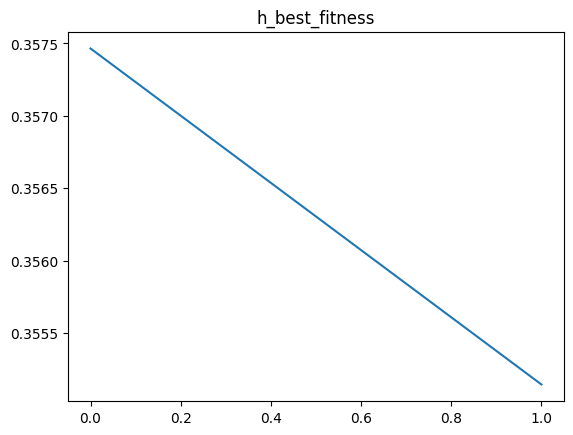

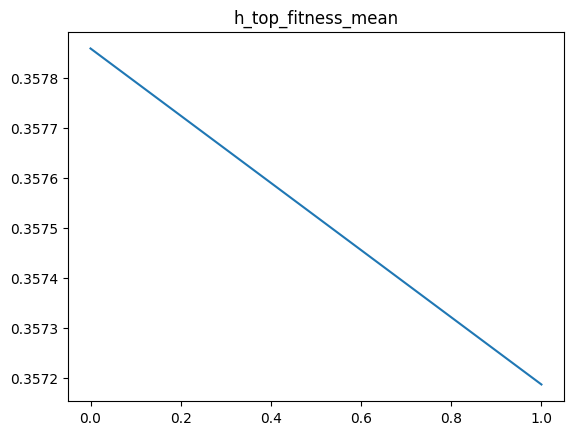

In [ ]:
best_global_individual, best_global_fitness, h_best_pop, h_parents, h_pop = evo_get_model()

# VISUALIZAMOS POBLACION POR GENERACIONES

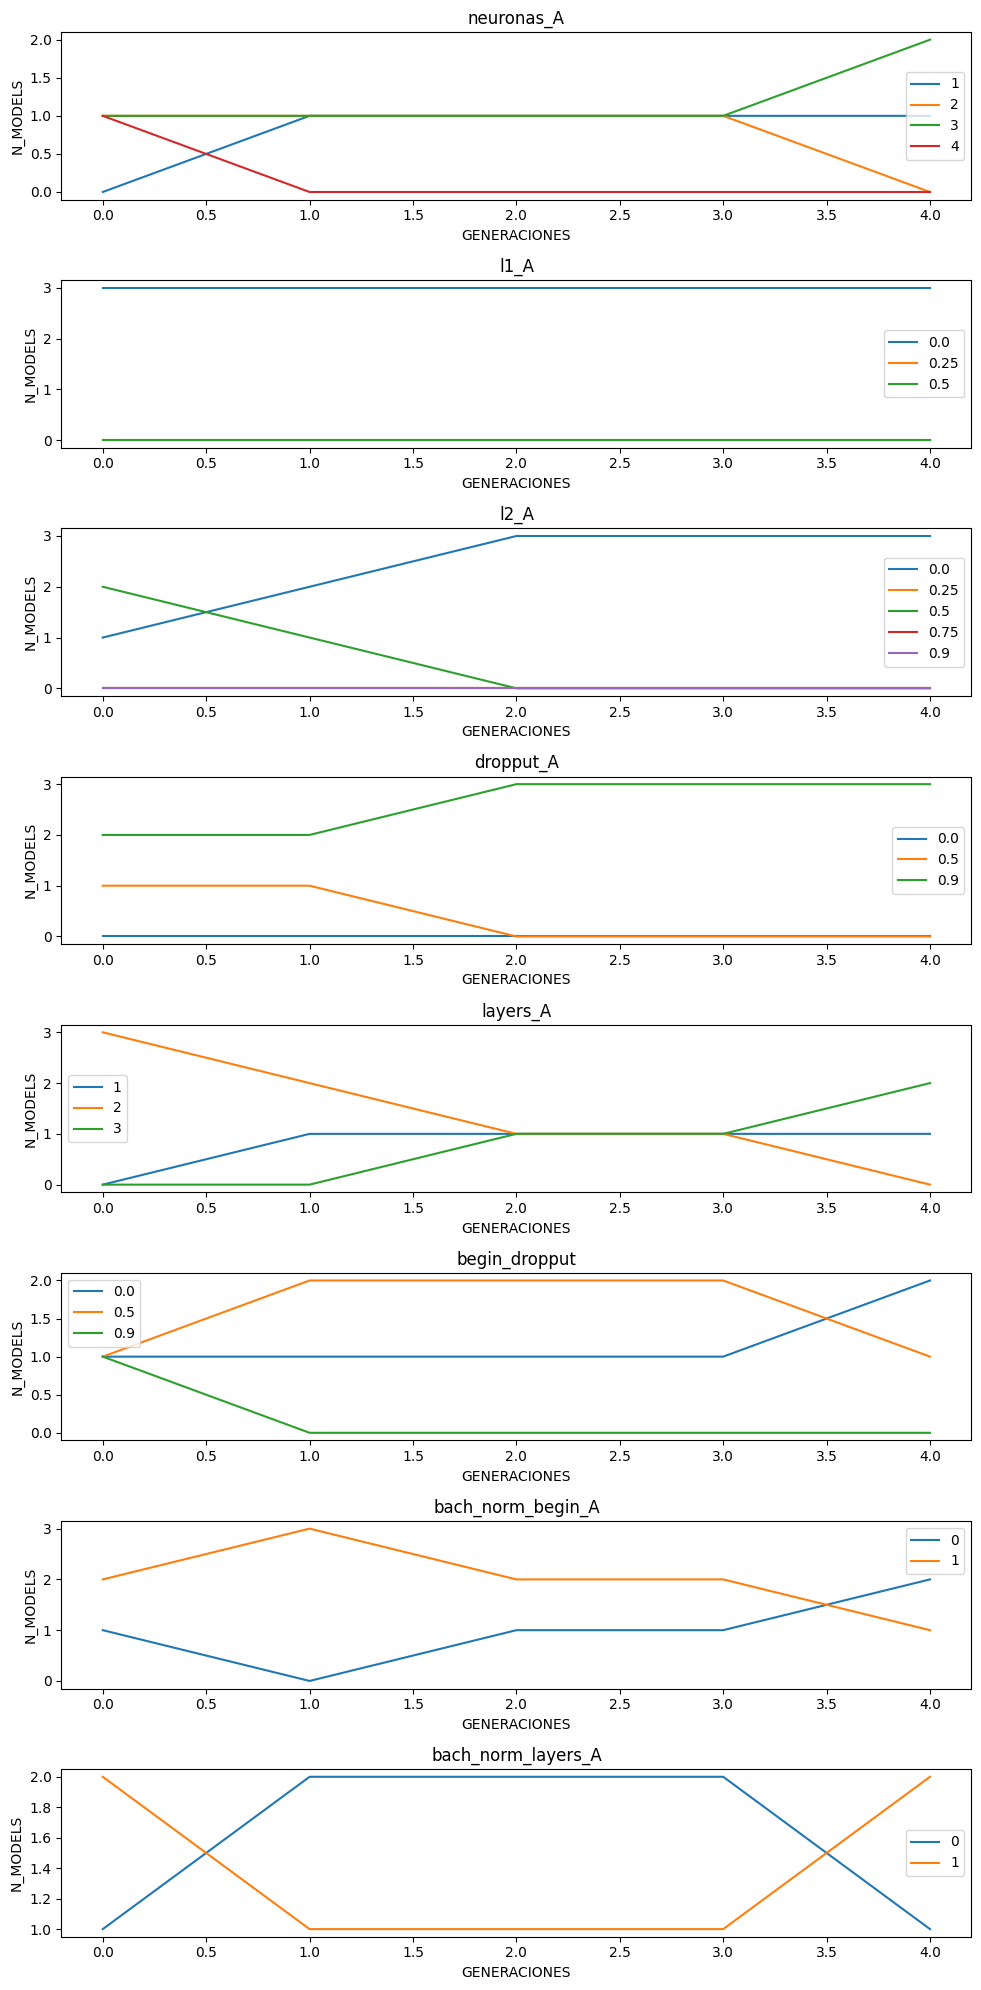

In [ ]:
h_best_pop.show_historical()

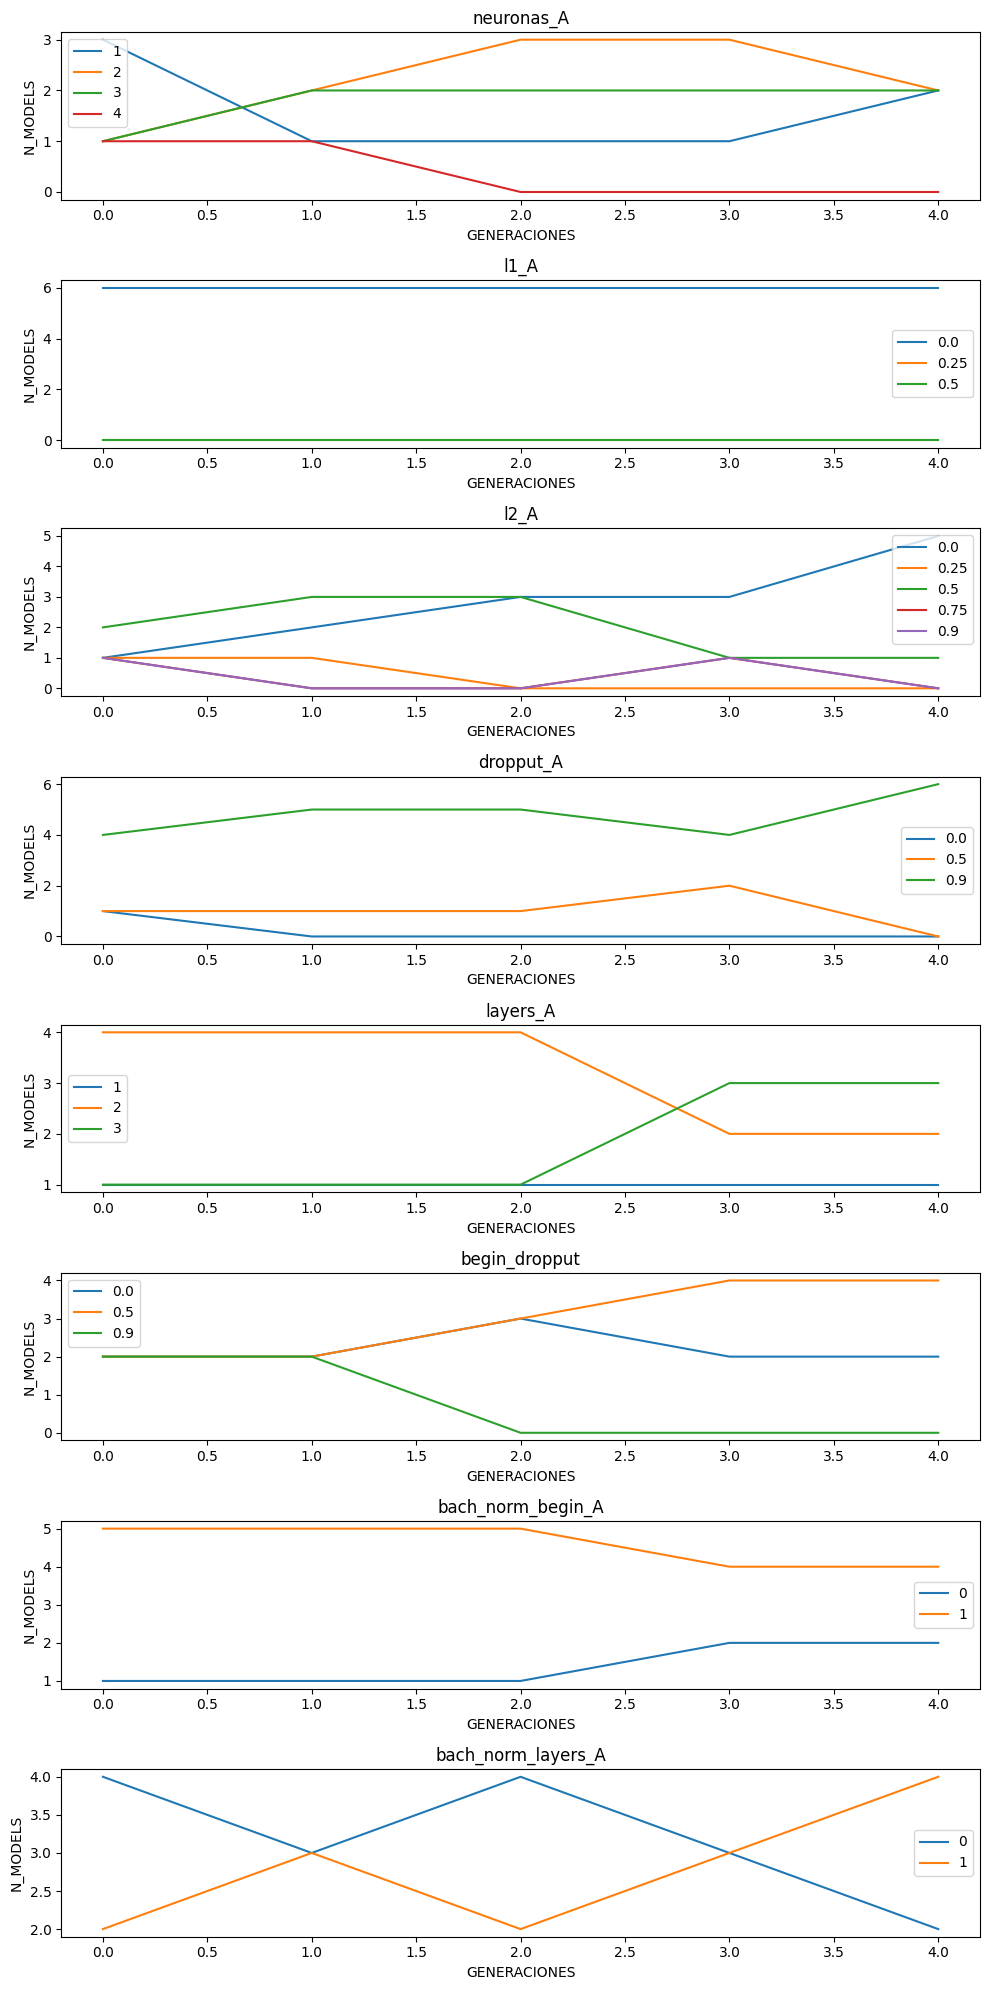

In [ ]:
h_parents.show_historical()

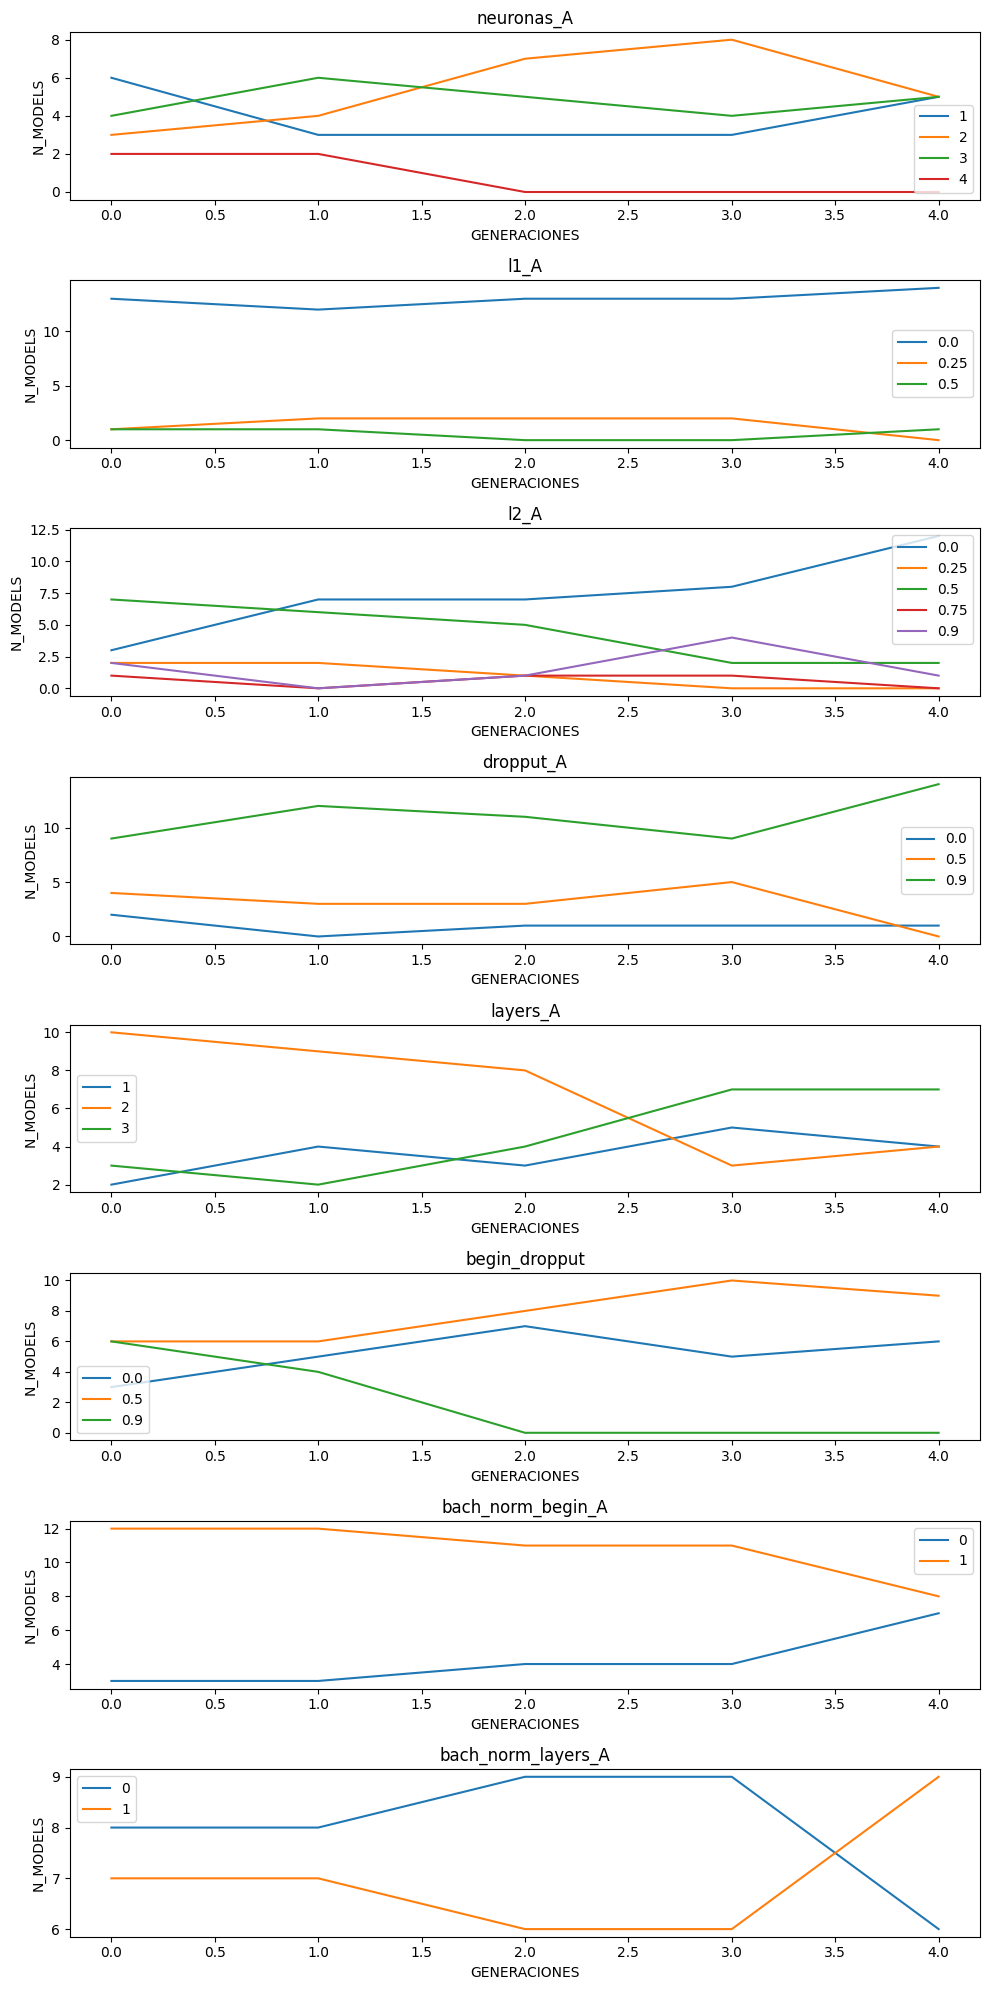

In [ ]:
h_pop.show_historical()

# Entrenamos el mejor

In [ ]:
X_COMP_TRAIN.shape

(239, 33, 8)

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
best_global_individual, best_global_fitness

(array([1. , 0. , 0. , 0. , 3. , 0.9, 0. , 0. ]), 0.3551442176103592)

In [ ]:

evo = evo_ranking()
model_a = evo.create_model(
    best_global_individual,
    X_COMP_TRAIN,
    Y_COMP_TRAIN,
    _learning_rate=0.01  )
model_a.summary()

Model: "model_354"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_355 (InputLayer)      [(None, 33, 8)]           0         
                                                                 
 dropout_1080 (Dropout)      (None, 33, 8)             0         
                                                                 
 dense_1080 (Dense)          (None, 33, 1)             9         
                                                                 
 dropout_1081 (Dropout)      (None, 33, 1)             0         
                                                                 
 dense_1081 (Dense)          (None, 33, 1)             2         
                                                                 
 dropout_1082 (Dropout)      (None, 33, 1)             0         
                                                                 
 dense_1082 (Dense)          (None, 33, 1)             2 

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 50, verbose=1, restore_best_weights=True)

history_model_a = model_a.fit(
                              X_COMP_TRAIN,
                              Y_COMP_TRAIN,
                              epochs=2000,
                              batch_size= 1,
                              validation_data=( X_COMP_VALID , Y_COMP_VALID),
                              verbose=1,
                              callbacks=[early_stopping]
                              )

Epoch 1/2000
239/239 [==============================] - 1s 3ms/step - loss: 0.3586 - val_loss: 0.3555
Epoch 2/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3582 - val_loss: 0.3557
Epoch 3/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.3580 - val_loss: 0.3555
Epoch 4/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.3573 - val_loss: 0.3584
Epoch 5/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3556
Epoch 6/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.3579 - val_loss: 0.3613
Epoch 7/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3575 - val_loss: 0.3673
Epoch 8/2000
239/239 [==============================] - 0s 2ms/step - loss: 0.3576 - val_loss: 0.3593
Epoch 9/2000
239/239 [==============================] - 1s 2ms/step - loss: 0.3570 - val_loss: 0.3626
Epoch 10/2000
239/239 [==============================] - 1s 3ms/step - loss: 0.359

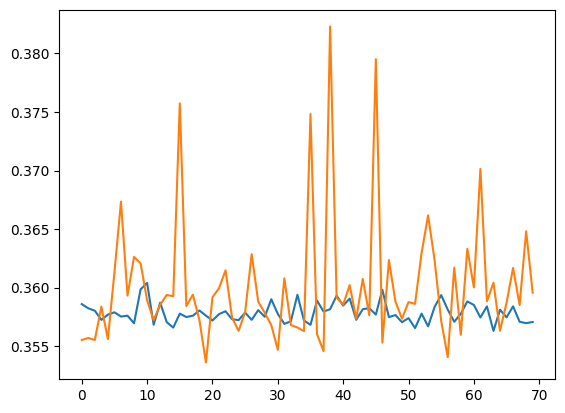

In [ ]:
plt.plot(history_model_a.history["loss"])
plt.plot(history_model_a.history["val_loss"])

# Vemos predicciones del mejor

In [ ]:
y_pred = model_a(X_COMP_TEST)

## HISTORICO RANKING REAL

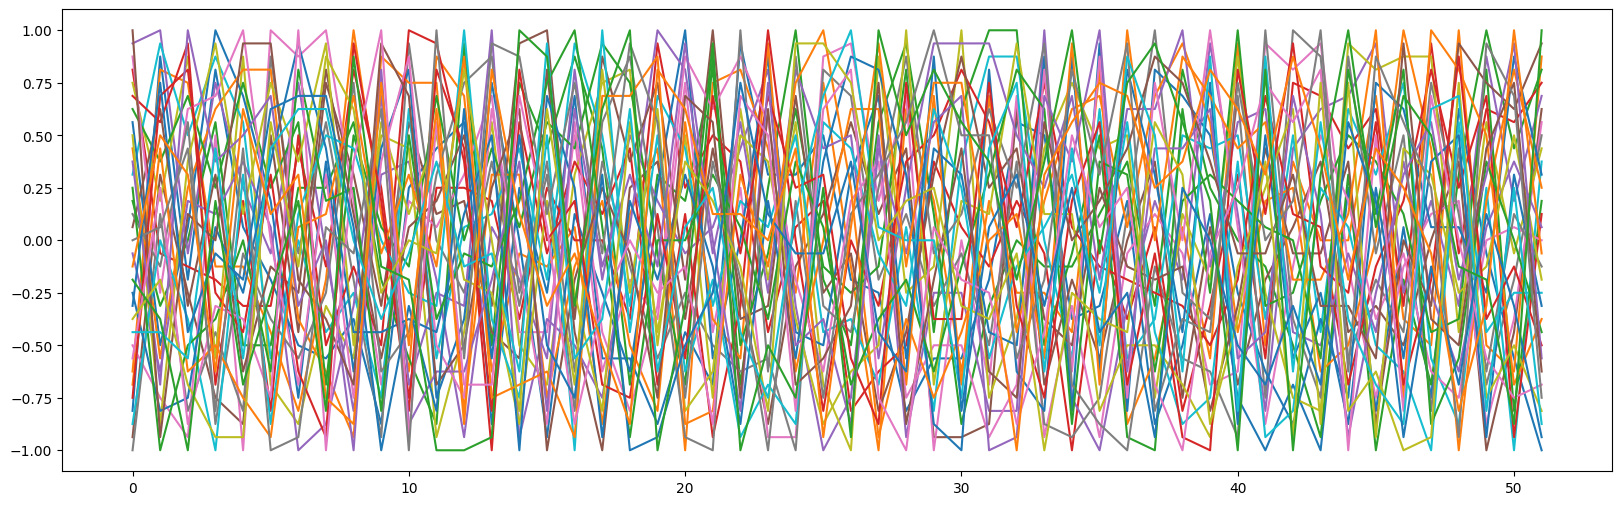

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(pd.DataFrame(Y_COMP_TEST , columns=data_componentes_IBEX.columns) );

## HISTORICO RANKING PRED

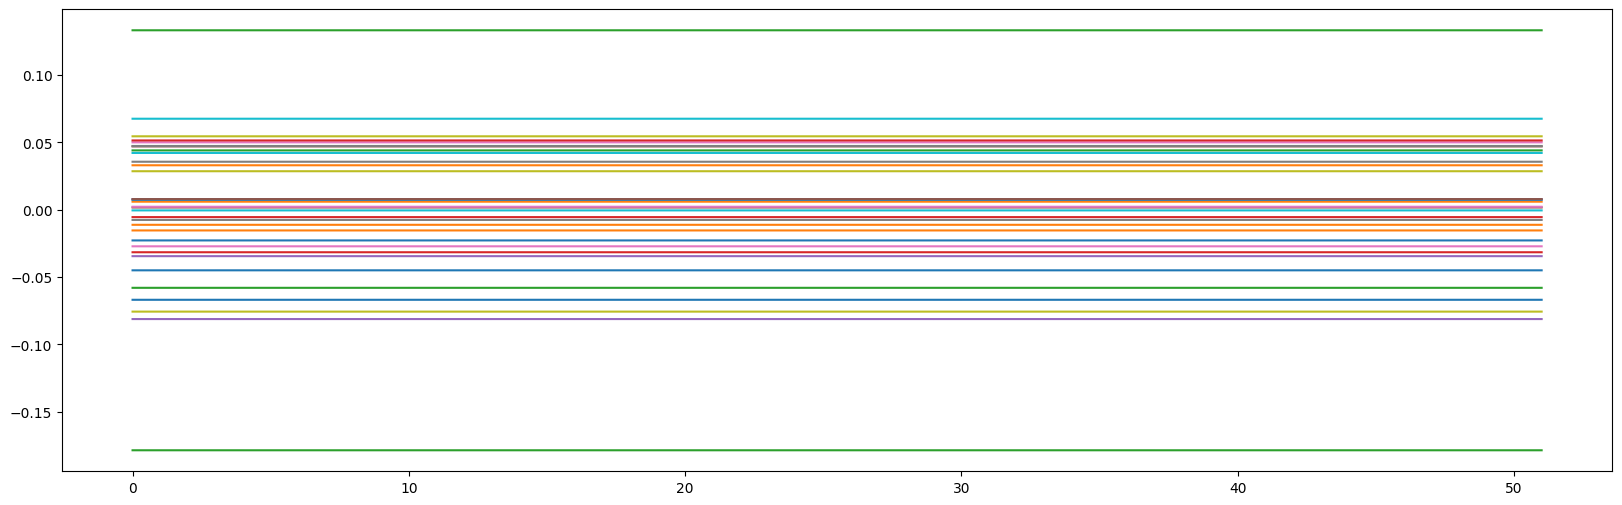

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot((pd.DataFrame(y_pred , columns=data_componentes_IBEX.columns) ));

# COMPARACION

In [ ]:
# Guarda el modelo original
model_a.save('temp_model.h5')

In [ ]:
def fake_model(data, data_forward, top):
  # Obtener los índices de los elementos ordenados
  sorted_indices = np.argsort(data)
  top_10_indices = sorted_indices[-top:]
  return data_forward[top_10_indices].mean()

In [ ]:
model_standard = keras.models.load_model('temp_model.h5')
model_evo = keras.models.load_model('temp_model.h5')


In [ ]:
top_activos = 8

h_sharpe_model = []
h_standard_model = []


for i in range(len(X_COMP_TEST)):

  data = X_COMP_TEST[i]
  sharpe = X_COMP_TEST[i][:,5]
  data_forward = Y_REAL_FORWARD_SHARPE_TEST[i]

  # fake_model
  avg_sharpe = fake_model(sharpe, data_forward, top_activos)
  h_sharpe_model.append(avg_sharpe)

  # standard_model
  s_y_pred = model_standard(np.array([data]))[0].numpy()
  sorted_indices = np.argsort(s_y_pred)
  sorted_indices_ = np.argsort(sorted_indices)
  idx_activos = np.where(sorted_indices_ < top_activos)
  avg_sharpe = Y_REAL_FORWARD_SHARPE_TEST[i][idx_activos].mean()

  h_standard_model.append(avg_sharpe)

h_sharpe_model = np.array(h_sharpe_model)
h_standard_model = np.array(h_standard_model)

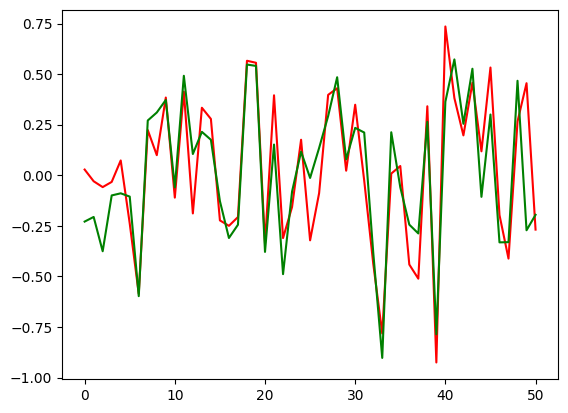

In [ ]:
plt.plot(h_sharpe_model, color = "red")
plt.plot(h_standard_model, color = "green")

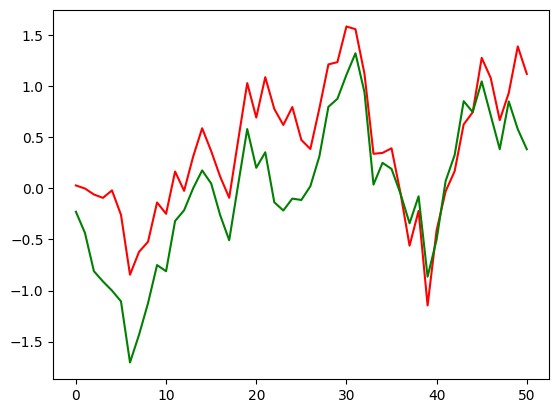

In [ ]:
plt.plot(h_sharpe_model.cumsum(), color = "red")
plt.plot(h_standard_model.cumsum(), color = "green")